<a href="https://colab.research.google.com/github/rajendrasolleti/Avocado_Price_Prediction/blob/master/Term2_ML_project_Avacado_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Term-2 Project Avacado Price Prediction***

##***Data Cleaning and EDA***

###***Problem Description***

We are trying to predict the average price of the avacado during that period.

***Installing and importing the required modules***

In [19]:
!pip install pandas_profiling
import numpy as np
import pandas as pd
import pandas_profiling as pdpf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from IPython.display import display
pd.options.display.max_columns = None

***Importing the Avacado sales data into pandas dataframe***

In [20]:
Avacado_Data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')
Avacado_Data.Date = pd.to_datetime(Avacado_Data.Date)
Avacado_Data.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [21]:
#Avacado_Data.type = Avacado_Data.type.astype('|S')
Avacado_Data.info()
Avacado_Data.describe(include = 'all')
Avacado_Data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

###Preprocessing the data###

1.  Creating two new columns Month and day by splitting the entire date to get a better picture.
2.  Columns 4046, 4225, 4770 represent the PLU code of the small, large and extra large avacadoes.
3.  We can drop date column as we have individual subsets of date. 
4. We will be dropping the unnamed column as well as this is just the serial number.
5. AveragePrice is the label that i am selecting and will try to predict the price.
6. No need to extract the dayofweek as all the values are coming out as 6 which means all the data collected is of Sunday only which doesn't add much value to our predicted model.

In [0]:
Avacado_Data['Month'] = Avacado_Data.Date.dt.month
Avacado_Data['Day'] = Avacado_Data.Date.dt.day
#Avacado_Data['DayofWeek'] = Avacado_Data.Date.dt.dayofweek
#Avacado_Data.drop(['Date', 'Unnamed: 0'], axis=1, inplace = True)

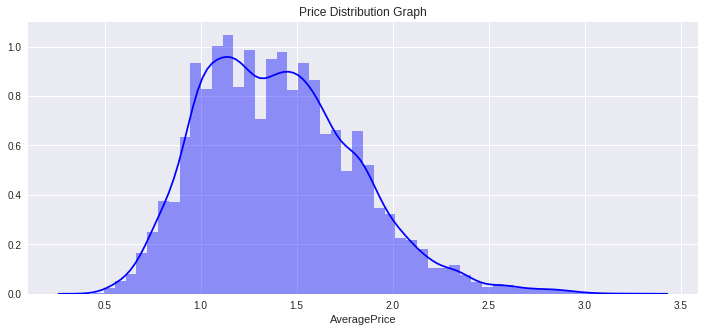

In [23]:
#sns.countplot(y='region', data = Avacado_Data)
#Avacado_Data.groupby(['year','Month'])['AveragePrice'].sum()[12:24]
#Avacado_Data.groupby(['region'])['AveragePrice'].sum()
#sns.distplot(Avacado_Data.groupby(['year','Month'])['AveragePrice'].sum())
plt.figure(figsize=(12,5))
plt.title("Price Distribution Graph")
ax = sns.distplot(Avacado_Data["AveragePrice"], color = 'blue')

We could notice that trhe price is slightly right skewed and most of the time the price is between 1 and 1.7

Text(0.5,1,'Average Price')

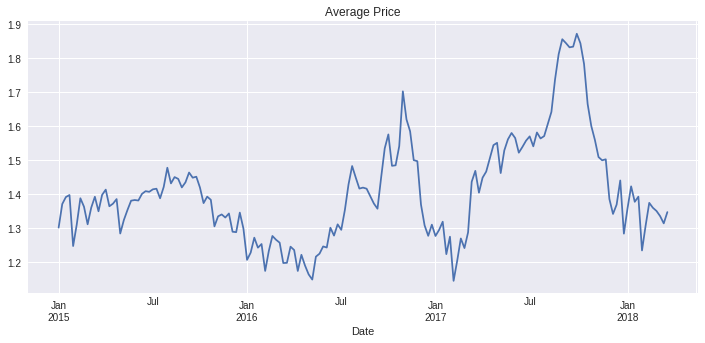

In [24]:
dategroup=Avacado_Data.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=Avacado_Data.Date)
plt.title('Average Price')

Text(0.5,1,'Total Volume')

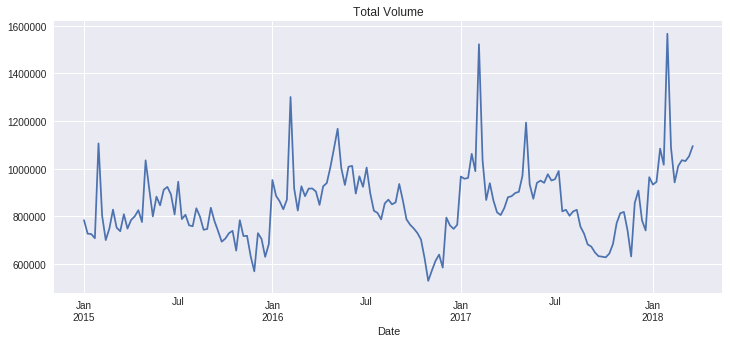

In [25]:
dategroup=Avacado_Data.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['Total Volume'].plot(x=Avacado_Data.Date)
plt.title('Total Volume')

#line1, = plt.plot(Avacado_Data.Date, dategroup['Total Volume'], 'r', label = 'line 1')
#line2, = plt.plot(Avacado_Data.Date, dategroup['AveragePrice'], 'b', label = 'line 2')

#plt.legend([line1, line2],['Standardised Total Value of Cars Sold','Total Number of Cars Sold'])
#plt.title('Distribution of No of cars sold and the Total value of them per annum')
#plt.show()

From the above chart we could infer that 

*   We could observe from this graph that September and October are the months where the price seems to be at its highest
*   February is the month where the price seems to be the lowest.
*   Though the volume almost remained same, price seems to increase year on year

By comparing two charts above we could see that sometimes price and volume and inversely proportional(i.e. When volume increases price decreases)

Text(0.5,1,'Average Price by Month')

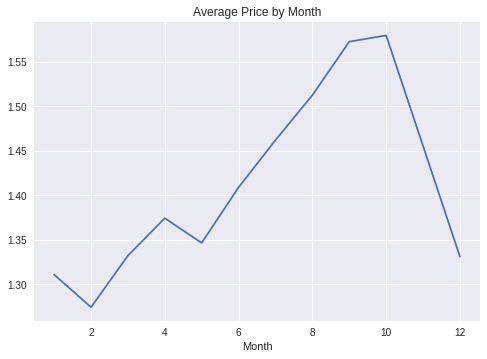

In [26]:
dategroup=Avacado_Data.groupby('Month').mean()
dategroup['AveragePrice'].plot(x=Avacado_Data.Month)
plt.title('Average Price by Month')

This confirms our previous observation that Feb is the lowest price month and oct and Nov seems to be the highest priced months

Text(0.5,1,'Total Volume by Month')

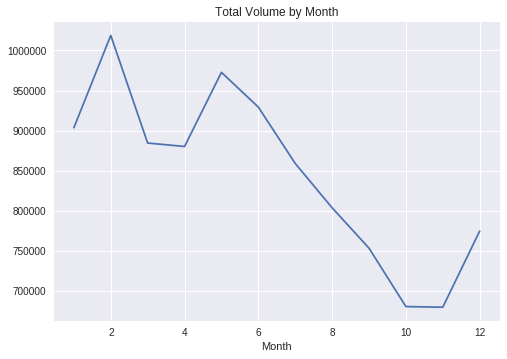

In [27]:
dategroup=Avacado_Data.groupby('Month').mean()
dategroup['Total Volume'].plot(x=Avacado_Data.Month)
plt.title('Total Volume by Month')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Yearly Average Price in Each Region')

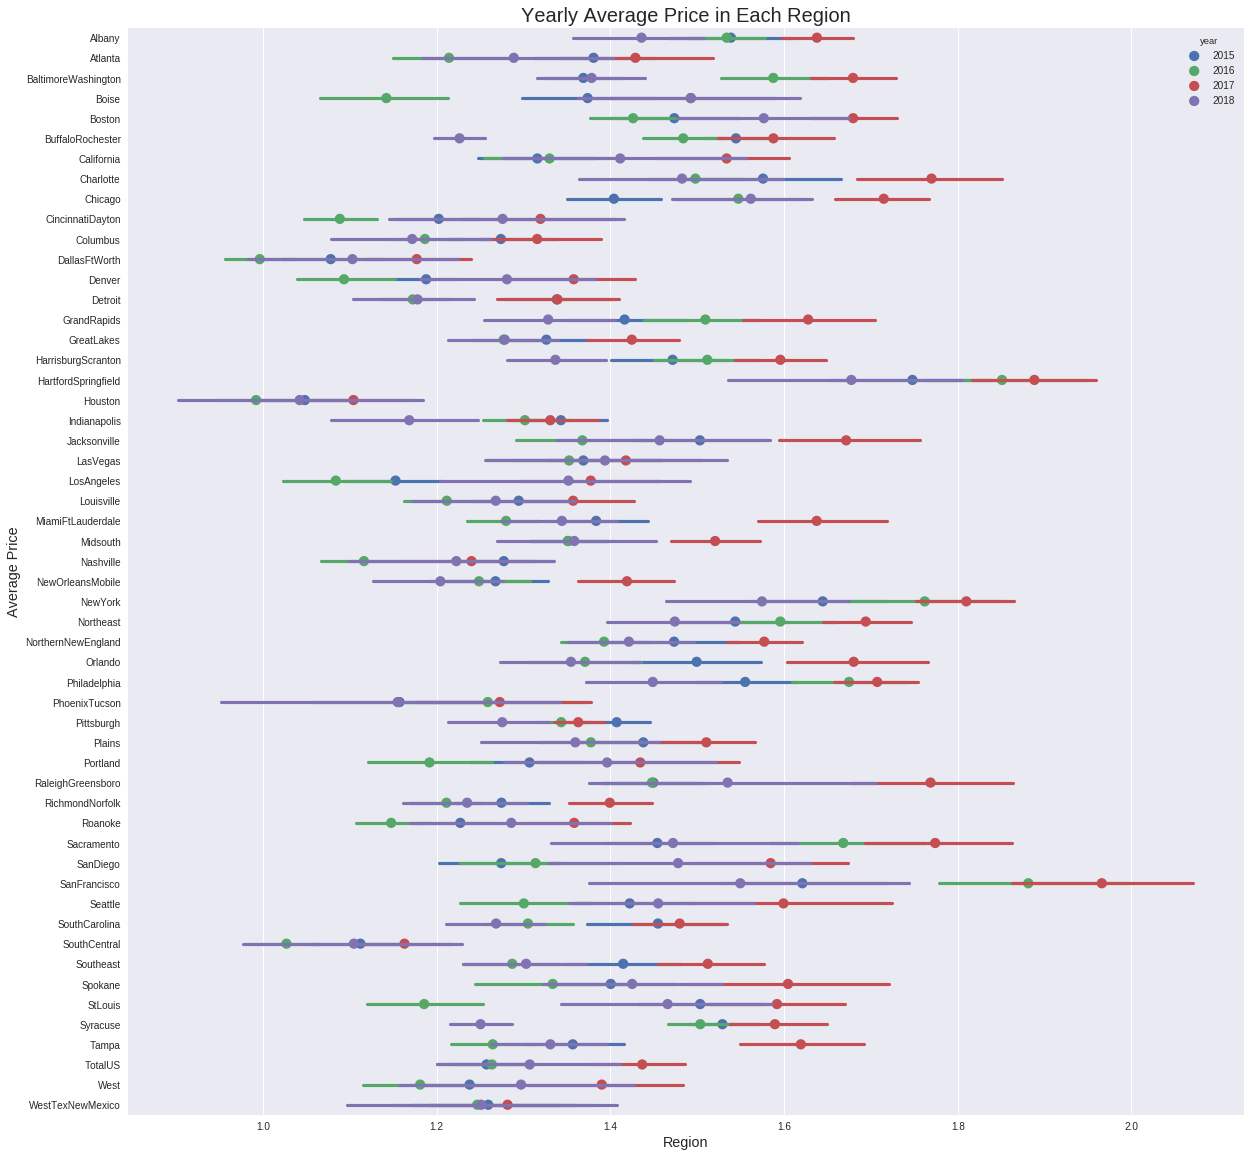

In [28]:
plt.figure(figsize=(20,20))
sns.pointplot(x='AveragePrice',y='region',data=Avacado_Data, hue='year',join=False)
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Hartfordspringfield and San Fransisco seems to be the costliest states while southcentral and houston remains to be the cheapest.

In [29]:
corr_matrix = Avacado_Data.corr()
Avacado_Data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,7


We will be converting only the avacado type to two different columns

In [74]:
#Avacado_Data.hist(bins=50, figsize=(20,15))
corr1 =  corr_matrix["AveragePrice"].sort_values(ascending=False)
n = pd.get_dummies(Avacado_Data.type)
Avacado_Data = pd.concat([Avacado_Data, n], axis=1)
#m = pd.get_dummies(Avacado_Data.region)
#Avacado_Data = pd.concat([Avacado_Data, m], axis=1)
drops = ['AveragePrice']
print(corr1)

AveragePrice    1.000000
Month           0.162409
year            0.093197
Day             0.027386
XLarge Bags    -0.117592
Unnamed: 0     -0.133008
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64


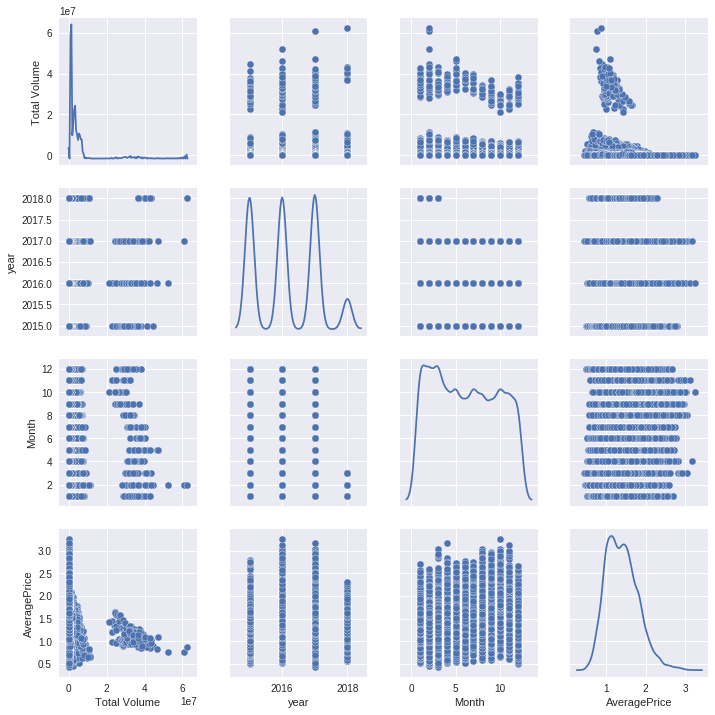

In [31]:
sns.pairplot(Avacado_Data[["type", "region", "Total Volume", "year", "Month", "AveragePrice"]], diag_kind="kde")

***We are not doing an inplace replacement while dropping so as to find any relation between the dropped columns***

In [75]:
#Avacado_Data_subset = Avacado_Data.drop(['Unnamed: 0', '4046','4225','4770','Small Bags', 'Large Bags', 'XLarge Bags','type','Date','Total Bags'], axis=1)
Avacado_Data_subset = Avacado_Data.drop(['Unnamed: 0', 'type','Date'], axis=1)
Avacado_Data_subset.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,conventional,organic,conventional,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,1,0,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,1,0,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,1,0,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,1,0,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,1,0,1,0


###Understanding the data using profile report and correlation matrix###

Text(0.5,1,'Correlation between features')

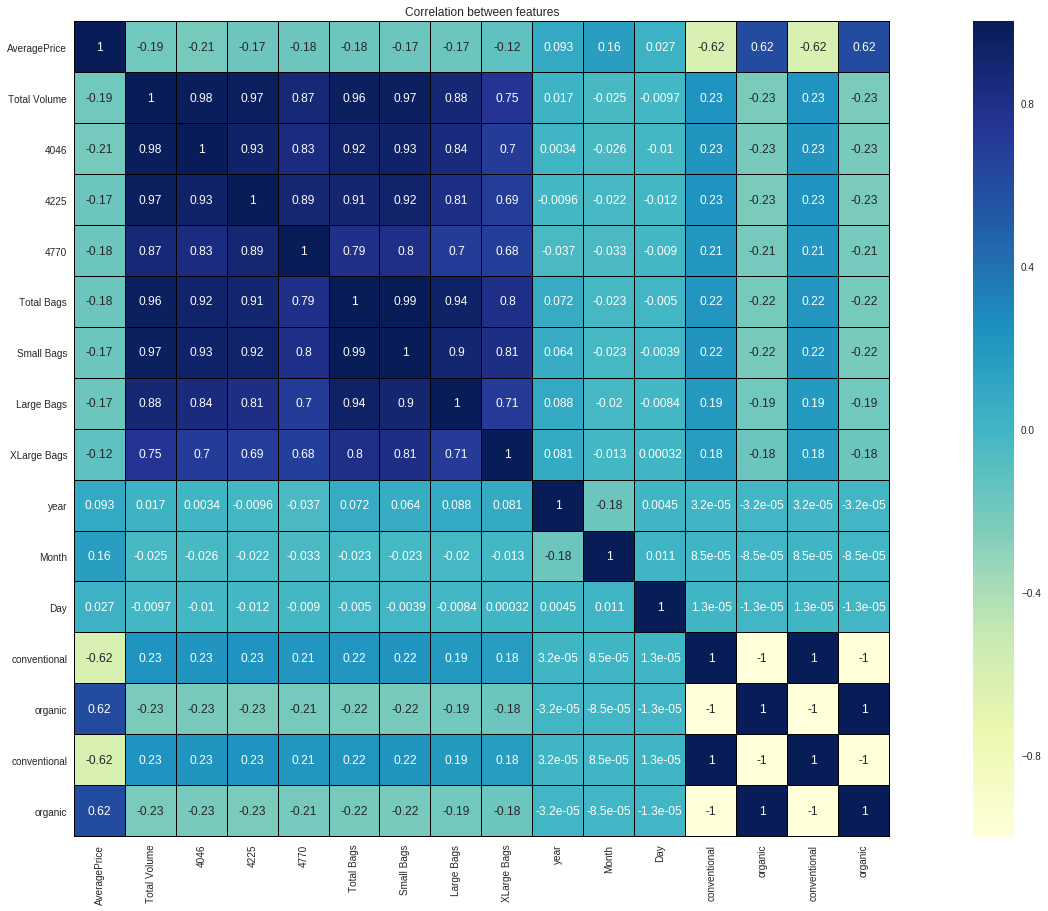

In [89]:
corr = Avacado_Data_subset.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [0]:
pdpf.ProfileReport(Avacado_Data_subset)

###Splitting the data into train and test after extracting the lable(price) that we are going to predict ###
 

***Encoding columns region and type of avacadoes so that they can be fed as input to the model***

In [0]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(Avacado_Data_subset.region)
label_encoder.classes_
Avacado_Data_subset.region =  label_encoder.transform(Avacado_Data_subset.region)

In [0]:
#label_encoder_type = preprocessing.LabelEncoder()
#label_encoder_type.fit(Avacado_Data_subset.type)
#label_encoder_type.classes_
#Avacado_Data_subset.type =  label_encoder_type.transform(Avacado_Data_subset.type)
#Avacado_Data_subset.type.unique()
#Avacado_Data_subset.drop(['type'], axis=1, inplace = True)
#Avacado_Data_subset.head(5)

**Splitting the data into train and test**

In [0]:
X = Avacado_Data_subset.loc[:,Avacado_Data_subset.columns != 'AveragePrice']
Y = Avacado_Data_subset.AveragePrice
#Avacado_Data_subset.AveragePrice.sort_values(ascending= False)
#X.head(5)

In [0]:
#!pip install scikit-learn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

**Evaluating different Models**

In [94]:
from sklearn.linear_model import LinearRegression
LinearRegressionModel = LinearRegression(fit_intercept = False, normalize = False).fit(X_train, y_train)
print("Model Accuracy using Linear Regression is", LinearRegressionModel.score(X_test, y_test))

Model Accuracy using Linear Regression is 0.44273661259362257


In [111]:
listofnumbers = []
for x in range (2, 10):
    listofnumbers.append(x)
print(listofnumbers)

[2, 3, 4, 5, 6, 7, 8, 9]


In [115]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV


#using gridsearch to find the best parameter
params = {'n_neighbors':listofnumbers}
knn = neighbors.KNeighborsRegressor()
knn_model = GridSearchCV(knn, params, cv=3)
knn_model.fit(X_train, y_train)
score = knn_model.score(X_test,y_test)
print("Model Accuracy using knn regressor is:",score)

Model Accuracy using knn regressor is: 0.6777763118016946


In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = build_model()

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [62]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

#plot_history(history)


...................................................................................

In [63]:
score = model.evaluate(X_test,y_test)
print("keras model score is:",sum(score)/len(score))

3650/3650 [==============================] - 0s 22us/step
keras model score is: 0.17927089679697059


In [152]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=1, n_estimators=50, bootstrap=True,  min_samples_split=2, n_jobs=10, min_samples_leaf=1, max_features='auto',
                                  oob_score=True)
forest_reg.fit(X_train, y_train)
#RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#           max_features='auto', max_leaf_nodes=None,
#           min_impurity_split=1e-07, min_samples_leaf=1,
#           min_samples_split=2, min_weight_fraction_leaf=0.0,
#           n_estimators=3, n_jobs=1, oob_score=False, 
#           verbose=1, warm_start=False)

print('Random Forest Regressor score is": ', forest_reg.score(X_test, y_test))





Random Forest Regressor score is":  0.8955127941352814


In [0]:
#Avacado_Data_subset.info()
#Avacado_Data_subset.AveragePrice.unique()
#Avacado_Data_subset['year'].unique()
#Avacado_Data_subset['region'].unique()
#Avacado_Data_subset['Month'].unique()
#Avacado_Data_subset['Day'].unique()
#Avacado_Data_subset.head(5)
X_train.head


